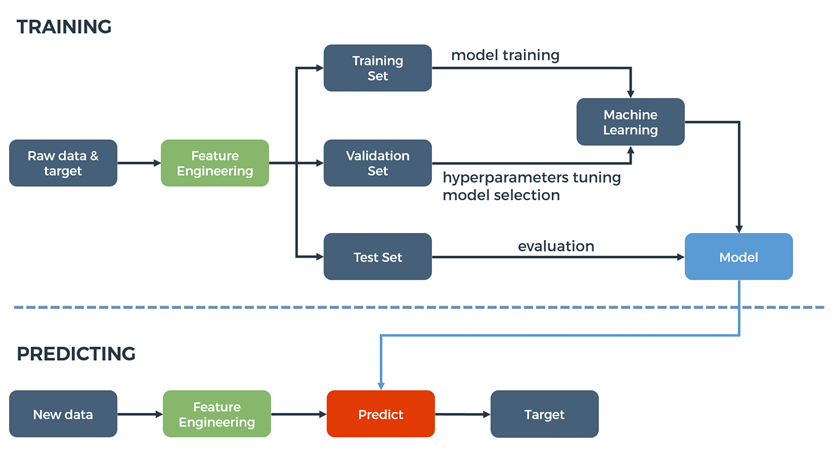

In [2]:
import numpy as np
import torch

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [3]:
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

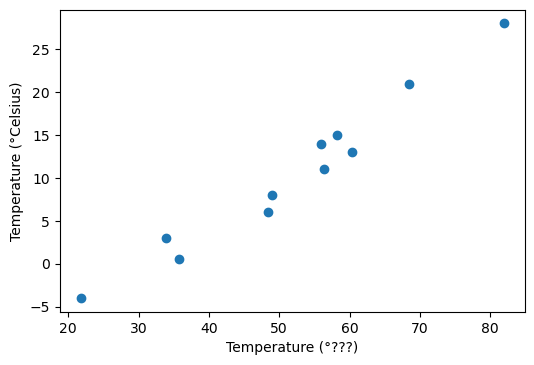

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=100)
plt.xlabel("Temperature (°???)")
plt.ylabel("Temperature (°Celsius)")

plt.plot(t_u, t_c, 'o')

This can be the model

Temp in celcius is weight multiplied by temp in unknown and with added bias

t_c = w * t_u + b


In [5]:
def model(t_u, w, b): return w * t_u + b

In [6]:
def loss_fn(t_p, t_c): 
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [7]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [8]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

gradient descent

In [9]:
delta = 0.1

In [10]:
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [11]:
learning_rate = 1e-2

In [12]:
w = w - learning_rate * loss_rate_of_change_w

In [13]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

derivates of loss, w, b are computed bellow:

In [15]:
def dloss_fn(t_p, t_c): 
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0) 
    return dsq_diffs

In [16]:
def dmodel_dw(t_u, w, b):
    return t_u

In [17]:
def dmodel_db(t_u, w, b):
    return 1.0

gradient

In [18]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  

iterating to fit

In [20]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # Forward pass
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # backward pass

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) 
            
    return params

In [21]:
training_loop(n_epochs = 100, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]), t_u = t_u, t_c = t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 5802484.500000
Epoch 3, Loss 19408029696.000000
Epoch 4, Loss 64915905708032.000000
Epoch 5, Loss 217130525461053440.000000
Epoch 6, Loss 726257583152928129024.000000
Epoch 7, Loss 2429183416467662896627712.000000
Epoch 8, Loss 8125122549611731432050262016.000000
Epoch 9, Loss 27176882120842590626938030653440.000000
Epoch 10, Loss 90901105189019073810297959556841472.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss

tensor([nan, nan])

In [22]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 323.090515
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540283
Epoch 6, Loss 29.351154
Epoch 7, Loss 29.148884
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105247
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102295
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100466
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097717
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095881
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092216
Epoch 25, Loss 29.091301
Epoch 26, Loss 29.090385
Epoch 27, Loss 29.089464
Epoch 28, Loss 29.088551
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086714
Epoch 31, Loss 29.085804
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083967
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081221
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079390
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077562
Epoch 

tensor([ 0.2327, -0.0438])

normalization (normalizing inputs)

In [23]:
t_un = 0.1 * t_u

In [24]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([ 2.7553, -2.5162])

In [26]:
training_loop(
    n_epochs = 10000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

Epoch 739, Loss 5.115978
Epoch 740, Loss 5.108547
Epoch 741, Loss 5.101143
Epoch 742, Loss 5.093765
Epoch 743, Loss 5.086414
Epoch 744, Loss 5.079086
Epoch 745, Loss 5.071781
Epoch 746, Loss 5.064505
Epoch 747, Loss 5.057247
Epoch 748, Loss 5.050021
Epoch 749, Loss 5.042817
Epoch 750, Loss 5.035636
Epoch 751, Loss 5.028476
Epoch 752, Loss 5.021346
Epoch 753, Loss 5.014240
Epoch 754, Loss 5.007157
Epoch 755, Loss 5.000099
Epoch 756, Loss 4.993064
Epoch 757, Loss 4.986051
Epoch 758, Loss 4.979064
Epoch 759, Loss 4.972100
Epoch 760, Loss 4.965159
Epoch 761, Loss 4.958245
Epoch 762, Loss 4.951351
Epoch 763, Loss 4.944479
Epoch 764, Loss 4.937633
Epoch 765, Loss 4.930812
Epoch 766, Loss 4.924009
Epoch 767, Loss 4.917234
Epoch 768, Loss 4.910480
Epoch 769, Loss 4.903749
Epoch 770, Loss 4.897040
Epoch 771, Loss 4.890356
Epoch 772, Loss 4.883692
Epoch 773, Loss 4.877052
Epoch 774, Loss 4.870436
Epoch 775, Loss 4.863839
Epoch 776, Loss 4.857268
Epoch 777, Loss 4.850718
Epoch 778, Loss 4.844189


Epoch 1495, Loss 3.095011
Epoch 1496, Loss 3.094444
Epoch 1497, Loss 3.093877
Epoch 1498, Loss 3.093314
Epoch 1499, Loss 3.092751
Epoch 1500, Loss 3.092191
Epoch 1501, Loss 3.091630
Epoch 1502, Loss 3.091074
Epoch 1503, Loss 3.090520
Epoch 1504, Loss 3.089969
Epoch 1505, Loss 3.089417
Epoch 1506, Loss 3.088867
Epoch 1507, Loss 3.088320
Epoch 1508, Loss 3.087775
Epoch 1509, Loss 3.087232
Epoch 1510, Loss 3.086690
Epoch 1511, Loss 3.086150
Epoch 1512, Loss 3.085612
Epoch 1513, Loss 3.085075
Epoch 1514, Loss 3.084542
Epoch 1515, Loss 3.084009
Epoch 1516, Loss 3.083478
Epoch 1517, Loss 3.082948
Epoch 1518, Loss 3.082422
Epoch 1519, Loss 3.081897
Epoch 1520, Loss 3.081373
Epoch 1521, Loss 3.080850
Epoch 1522, Loss 3.080331
Epoch 1523, Loss 3.079811
Epoch 1524, Loss 3.079296
Epoch 1525, Loss 3.078781
Epoch 1526, Loss 3.078268
Epoch 1527, Loss 3.077758
Epoch 1528, Loss 3.077248
Epoch 1529, Loss 3.076739
Epoch 1530, Loss 3.076232
Epoch 1531, Loss 3.075729
Epoch 1532, Loss 3.075225
Epoch 1533, 

Epoch 2252, Loss 2.940403
Epoch 2253, Loss 2.940358
Epoch 2254, Loss 2.940316
Epoch 2255, Loss 2.940274
Epoch 2256, Loss 2.940229
Epoch 2257, Loss 2.940188
Epoch 2258, Loss 2.940144
Epoch 2259, Loss 2.940102
Epoch 2260, Loss 2.940060
Epoch 2261, Loss 2.940018
Epoch 2262, Loss 2.939977
Epoch 2263, Loss 2.939934
Epoch 2264, Loss 2.939891
Epoch 2265, Loss 2.939851
Epoch 2266, Loss 2.939809
Epoch 2267, Loss 2.939770
Epoch 2268, Loss 2.939727
Epoch 2269, Loss 2.939686
Epoch 2270, Loss 2.939646
Epoch 2271, Loss 2.939605
Epoch 2272, Loss 2.939566
Epoch 2273, Loss 2.939522
Epoch 2274, Loss 2.939483
Epoch 2275, Loss 2.939443
Epoch 2276, Loss 2.939403
Epoch 2277, Loss 2.939361
Epoch 2278, Loss 2.939323
Epoch 2279, Loss 2.939282
Epoch 2280, Loss 2.939243
Epoch 2281, Loss 2.939205
Epoch 2282, Loss 2.939165
Epoch 2283, Loss 2.939127
Epoch 2284, Loss 2.939087
Epoch 2285, Loss 2.939049
Epoch 2286, Loss 2.939011
Epoch 2287, Loss 2.938971
Epoch 2288, Loss 2.938933
Epoch 2289, Loss 2.938893
Epoch 2290, 

Epoch 3029, Loss 2.928555
Epoch 3030, Loss 2.928551
Epoch 3031, Loss 2.928548
Epoch 3032, Loss 2.928545
Epoch 3033, Loss 2.928543
Epoch 3034, Loss 2.928539
Epoch 3035, Loss 2.928536
Epoch 3036, Loss 2.928532
Epoch 3037, Loss 2.928531
Epoch 3038, Loss 2.928528
Epoch 3039, Loss 2.928524
Epoch 3040, Loss 2.928521
Epoch 3041, Loss 2.928519
Epoch 3042, Loss 2.928514
Epoch 3043, Loss 2.928512
Epoch 3044, Loss 2.928509
Epoch 3045, Loss 2.928505
Epoch 3046, Loss 2.928503
Epoch 3047, Loss 2.928500
Epoch 3048, Loss 2.928498
Epoch 3049, Loss 2.928495
Epoch 3050, Loss 2.928491
Epoch 3051, Loss 2.928489
Epoch 3052, Loss 2.928486
Epoch 3053, Loss 2.928484
Epoch 3054, Loss 2.928481
Epoch 3055, Loss 2.928477
Epoch 3056, Loss 2.928474
Epoch 3057, Loss 2.928472
Epoch 3058, Loss 2.928469
Epoch 3059, Loss 2.928468
Epoch 3060, Loss 2.928463
Epoch 3061, Loss 2.928460
Epoch 3062, Loss 2.928458
Epoch 3063, Loss 2.928456
Epoch 3064, Loss 2.928452
Epoch 3065, Loss 2.928449
Epoch 3066, Loss 2.928447
Epoch 3067, 

Epoch 3593, Loss 2.927780
Epoch 3594, Loss 2.927778
Epoch 3595, Loss 2.927779
Epoch 3596, Loss 2.927778
Epoch 3597, Loss 2.927778
Epoch 3598, Loss 2.927779
Epoch 3599, Loss 2.927777
Epoch 3600, Loss 2.927776
Epoch 3601, Loss 2.927775
Epoch 3602, Loss 2.927776
Epoch 3603, Loss 2.927773
Epoch 3604, Loss 2.927775
Epoch 3605, Loss 2.927775
Epoch 3606, Loss 2.927775
Epoch 3607, Loss 2.927773
Epoch 3608, Loss 2.927773
Epoch 3609, Loss 2.927773
Epoch 3610, Loss 2.927772
Epoch 3611, Loss 2.927772
Epoch 3612, Loss 2.927770
Epoch 3613, Loss 2.927772
Epoch 3614, Loss 2.927771
Epoch 3615, Loss 2.927770
Epoch 3616, Loss 2.927770
Epoch 3617, Loss 2.927769
Epoch 3618, Loss 2.927768
Epoch 3619, Loss 2.927769
Epoch 3620, Loss 2.927768
Epoch 3621, Loss 2.927767
Epoch 3622, Loss 2.927767
Epoch 3623, Loss 2.927767
Epoch 3624, Loss 2.927765
Epoch 3625, Loss 2.927766
Epoch 3626, Loss 2.927765
Epoch 3627, Loss 2.927765
Epoch 3628, Loss 2.927764
Epoch 3629, Loss 2.927764
Epoch 3630, Loss 2.927764
Epoch 3631, 

Epoch 4349, Loss 2.927657
Epoch 4350, Loss 2.927656
Epoch 4351, Loss 2.927657
Epoch 4352, Loss 2.927657
Epoch 4353, Loss 2.927657
Epoch 4354, Loss 2.927655
Epoch 4355, Loss 2.927656
Epoch 4356, Loss 2.927656
Epoch 4357, Loss 2.927656
Epoch 4358, Loss 2.927657
Epoch 4359, Loss 2.927656
Epoch 4360, Loss 2.927656
Epoch 4361, Loss 2.927656
Epoch 4362, Loss 2.927655
Epoch 4363, Loss 2.927657
Epoch 4364, Loss 2.927655
Epoch 4365, Loss 2.927656
Epoch 4366, Loss 2.927656
Epoch 4367, Loss 2.927656
Epoch 4368, Loss 2.927654
Epoch 4369, Loss 2.927655
Epoch 4370, Loss 2.927656
Epoch 4371, Loss 2.927655
Epoch 4372, Loss 2.927657
Epoch 4373, Loss 2.927655
Epoch 4374, Loss 2.927657
Epoch 4375, Loss 2.927656
Epoch 4376, Loss 2.927655
Epoch 4377, Loss 2.927654
Epoch 4378, Loss 2.927655
Epoch 4379, Loss 2.927655
Epoch 4380, Loss 2.927654
Epoch 4381, Loss 2.927656
Epoch 4382, Loss 2.927655
Epoch 4383, Loss 2.927655
Epoch 4384, Loss 2.927655
Epoch 4385, Loss 2.927656
Epoch 4386, Loss 2.927656
Epoch 4387, 

Epoch 5107, Loss 2.927647
Epoch 5108, Loss 2.927646
Epoch 5109, Loss 2.927648
Epoch 5110, Loss 2.927646
Epoch 5111, Loss 2.927647
Epoch 5112, Loss 2.927645
Epoch 5113, Loss 2.927646
Epoch 5114, Loss 2.927648
Epoch 5115, Loss 2.927646
Epoch 5116, Loss 2.927647
Epoch 5117, Loss 2.927647
Epoch 5118, Loss 2.927646
Epoch 5119, Loss 2.927647
Epoch 5120, Loss 2.927646
Epoch 5121, Loss 2.927647
Epoch 5122, Loss 2.927646
Epoch 5123, Loss 2.927648
Epoch 5124, Loss 2.927647
Epoch 5125, Loss 2.927647
Epoch 5126, Loss 2.927647
Epoch 5127, Loss 2.927647
Epoch 5128, Loss 2.927647
Epoch 5129, Loss 2.927648
Epoch 5130, Loss 2.927647
Epoch 5131, Loss 2.927646
Epoch 5132, Loss 2.927646
Epoch 5133, Loss 2.927648
Epoch 5134, Loss 2.927646
Epoch 5135, Loss 2.927646
Epoch 5136, Loss 2.927647
Epoch 5137, Loss 2.927648
Epoch 5138, Loss 2.927644
Epoch 5139, Loss 2.927648
Epoch 5140, Loss 2.927647
Epoch 5141, Loss 2.927647
Epoch 5142, Loss 2.927648
Epoch 5143, Loss 2.927647
Epoch 5144, Loss 2.927647
Epoch 5145, 

Epoch 5869, Loss 2.927645
Epoch 5870, Loss 2.927647
Epoch 5871, Loss 2.927647
Epoch 5872, Loss 2.927647
Epoch 5873, Loss 2.927647
Epoch 5874, Loss 2.927646
Epoch 5875, Loss 2.927646
Epoch 5876, Loss 2.927646
Epoch 5877, Loss 2.927646
Epoch 5878, Loss 2.927647
Epoch 5879, Loss 2.927647
Epoch 5880, Loss 2.927646
Epoch 5881, Loss 2.927646
Epoch 5882, Loss 2.927645
Epoch 5883, Loss 2.927647
Epoch 5884, Loss 2.927647
Epoch 5885, Loss 2.927648
Epoch 5886, Loss 2.927645
Epoch 5887, Loss 2.927646
Epoch 5888, Loss 2.927646
Epoch 5889, Loss 2.927646
Epoch 5890, Loss 2.927646
Epoch 5891, Loss 2.927644
Epoch 5892, Loss 2.927644
Epoch 5893, Loss 2.927646
Epoch 5894, Loss 2.927645
Epoch 5895, Loss 2.927646
Epoch 5896, Loss 2.927646
Epoch 5897, Loss 2.927648
Epoch 5898, Loss 2.927648
Epoch 5899, Loss 2.927646
Epoch 5900, Loss 2.927646
Epoch 5901, Loss 2.927646
Epoch 5902, Loss 2.927646
Epoch 5903, Loss 2.927647
Epoch 5904, Loss 2.927646
Epoch 5905, Loss 2.927646
Epoch 5906, Loss 2.927646
Epoch 5907, 

Epoch 6641, Loss 2.927645
Epoch 6642, Loss 2.927645
Epoch 6643, Loss 2.927645
Epoch 6644, Loss 2.927645
Epoch 6645, Loss 2.927645
Epoch 6646, Loss 2.927645
Epoch 6647, Loss 2.927645
Epoch 6648, Loss 2.927645
Epoch 6649, Loss 2.927645
Epoch 6650, Loss 2.927645
Epoch 6651, Loss 2.927645
Epoch 6652, Loss 2.927645
Epoch 6653, Loss 2.927645
Epoch 6654, Loss 2.927645
Epoch 6655, Loss 2.927645
Epoch 6656, Loss 2.927645
Epoch 6657, Loss 2.927645
Epoch 6658, Loss 2.927645
Epoch 6659, Loss 2.927645
Epoch 6660, Loss 2.927645
Epoch 6661, Loss 2.927645
Epoch 6662, Loss 2.927645
Epoch 6663, Loss 2.927645
Epoch 6664, Loss 2.927645
Epoch 6665, Loss 2.927645
Epoch 6666, Loss 2.927645
Epoch 6667, Loss 2.927645
Epoch 6668, Loss 2.927645
Epoch 6669, Loss 2.927645
Epoch 6670, Loss 2.927645
Epoch 6671, Loss 2.927645
Epoch 6672, Loss 2.927645
Epoch 6673, Loss 2.927645
Epoch 6674, Loss 2.927645
Epoch 6675, Loss 2.927645
Epoch 6676, Loss 2.927645
Epoch 6677, Loss 2.927645
Epoch 6678, Loss 2.927645
Epoch 6679, 

Epoch 7410, Loss 2.927645
Epoch 7411, Loss 2.927645
Epoch 7412, Loss 2.927645
Epoch 7413, Loss 2.927645
Epoch 7414, Loss 2.927645
Epoch 7415, Loss 2.927645
Epoch 7416, Loss 2.927645
Epoch 7417, Loss 2.927645
Epoch 7418, Loss 2.927645
Epoch 7419, Loss 2.927645
Epoch 7420, Loss 2.927645
Epoch 7421, Loss 2.927645
Epoch 7422, Loss 2.927645
Epoch 7423, Loss 2.927645
Epoch 7424, Loss 2.927645
Epoch 7425, Loss 2.927645
Epoch 7426, Loss 2.927645
Epoch 7427, Loss 2.927645
Epoch 7428, Loss 2.927645
Epoch 7429, Loss 2.927645
Epoch 7430, Loss 2.927645
Epoch 7431, Loss 2.927645
Epoch 7432, Loss 2.927645
Epoch 7433, Loss 2.927645
Epoch 7434, Loss 2.927645
Epoch 7435, Loss 2.927645
Epoch 7436, Loss 2.927645
Epoch 7437, Loss 2.927645
Epoch 7438, Loss 2.927645
Epoch 7439, Loss 2.927645
Epoch 7440, Loss 2.927645
Epoch 7441, Loss 2.927645
Epoch 7442, Loss 2.927645
Epoch 7443, Loss 2.927645
Epoch 7444, Loss 2.927645
Epoch 7445, Loss 2.927645
Epoch 7446, Loss 2.927645
Epoch 7447, Loss 2.927645
Epoch 7448, 

Epoch 8159, Loss 2.927645
Epoch 8160, Loss 2.927645
Epoch 8161, Loss 2.927645
Epoch 8162, Loss 2.927645
Epoch 8163, Loss 2.927645
Epoch 8164, Loss 2.927645
Epoch 8165, Loss 2.927645
Epoch 8166, Loss 2.927645
Epoch 8167, Loss 2.927645
Epoch 8168, Loss 2.927645
Epoch 8169, Loss 2.927645
Epoch 8170, Loss 2.927645
Epoch 8171, Loss 2.927645
Epoch 8172, Loss 2.927645
Epoch 8173, Loss 2.927645
Epoch 8174, Loss 2.927645
Epoch 8175, Loss 2.927645
Epoch 8176, Loss 2.927645
Epoch 8177, Loss 2.927645
Epoch 8178, Loss 2.927645
Epoch 8179, Loss 2.927645
Epoch 8180, Loss 2.927645
Epoch 8181, Loss 2.927645
Epoch 8182, Loss 2.927645
Epoch 8183, Loss 2.927645
Epoch 8184, Loss 2.927645
Epoch 8185, Loss 2.927645
Epoch 8186, Loss 2.927645
Epoch 8187, Loss 2.927645
Epoch 8188, Loss 2.927645
Epoch 8189, Loss 2.927645
Epoch 8190, Loss 2.927645
Epoch 8191, Loss 2.927645
Epoch 8192, Loss 2.927645
Epoch 8193, Loss 2.927645
Epoch 8194, Loss 2.927645
Epoch 8195, Loss 2.927645
Epoch 8196, Loss 2.927645
Epoch 8197, 

Epoch 8927, Loss 2.927645
Epoch 8928, Loss 2.927645
Epoch 8929, Loss 2.927645
Epoch 8930, Loss 2.927645
Epoch 8931, Loss 2.927645
Epoch 8932, Loss 2.927645
Epoch 8933, Loss 2.927645
Epoch 8934, Loss 2.927645
Epoch 8935, Loss 2.927645
Epoch 8936, Loss 2.927645
Epoch 8937, Loss 2.927645
Epoch 8938, Loss 2.927645
Epoch 8939, Loss 2.927645
Epoch 8940, Loss 2.927645
Epoch 8941, Loss 2.927645
Epoch 8942, Loss 2.927645
Epoch 8943, Loss 2.927645
Epoch 8944, Loss 2.927645
Epoch 8945, Loss 2.927645
Epoch 8946, Loss 2.927645
Epoch 8947, Loss 2.927645
Epoch 8948, Loss 2.927645
Epoch 8949, Loss 2.927645
Epoch 8950, Loss 2.927645
Epoch 8951, Loss 2.927645
Epoch 8952, Loss 2.927645
Epoch 8953, Loss 2.927645
Epoch 8954, Loss 2.927645
Epoch 8955, Loss 2.927645
Epoch 8956, Loss 2.927645
Epoch 8957, Loss 2.927645
Epoch 8958, Loss 2.927645
Epoch 8959, Loss 2.927645
Epoch 8960, Loss 2.927645
Epoch 8961, Loss 2.927645
Epoch 8962, Loss 2.927645
Epoch 8963, Loss 2.927645
Epoch 8964, Loss 2.927645
Epoch 8965, 

Epoch 9691, Loss 2.927645
Epoch 9692, Loss 2.927645
Epoch 9693, Loss 2.927645
Epoch 9694, Loss 2.927645
Epoch 9695, Loss 2.927645
Epoch 9696, Loss 2.927645
Epoch 9697, Loss 2.927645
Epoch 9698, Loss 2.927645
Epoch 9699, Loss 2.927645
Epoch 9700, Loss 2.927645
Epoch 9701, Loss 2.927645
Epoch 9702, Loss 2.927645
Epoch 9703, Loss 2.927645
Epoch 9704, Loss 2.927645
Epoch 9705, Loss 2.927645
Epoch 9706, Loss 2.927645
Epoch 9707, Loss 2.927645
Epoch 9708, Loss 2.927645
Epoch 9709, Loss 2.927645
Epoch 9710, Loss 2.927645
Epoch 9711, Loss 2.927645
Epoch 9712, Loss 2.927645
Epoch 9713, Loss 2.927645
Epoch 9714, Loss 2.927645
Epoch 9715, Loss 2.927645
Epoch 9716, Loss 2.927645
Epoch 9717, Loss 2.927645
Epoch 9718, Loss 2.927645
Epoch 9719, Loss 2.927645
Epoch 9720, Loss 2.927645
Epoch 9721, Loss 2.927645
Epoch 9722, Loss 2.927645
Epoch 9723, Loss 2.927645
Epoch 9724, Loss 2.927645
Epoch 9725, Loss 2.927645
Epoch 9726, Loss 2.927645
Epoch 9727, Loss 2.927645
Epoch 9728, Loss 2.927645
Epoch 9729, 

tensor([  5.3676, -17.3042])

next lecture we continue with autogradient and optimizers

WE CONTINUE FROM SLIDE 11


In [4]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [5]:
def model(t_u, w, b):
    return w * t_u + b

In [6]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [7]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [8]:
params.grad is None

True

In [9]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([4517.2969,   82.6000])

In [11]:
if params.grad is not None:
    params.grad.zero_()

In [12]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  
            params.grad.zero_()
        
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [13]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0], requires_grad=True),
t_u = t_un,
t_c = t_c)


Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [14]:
import torch.optim as optim

In [15]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [16]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [17]:
learning_rate = 1e-5

In [18]:
optimizer = optim.SGD([params], lr=learning_rate)

In [19]:
t_p = model(t_u, *params)

In [20]:
loss = loss_fn(t_p, t_c)

In [21]:
loss.backward()

In [22]:
optimizer.step()

In [23]:
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [24]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad() 
loss.backward()
optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [25]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [26]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate) 

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [32]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.Adam([params], lr=learning_rate) 

training_loop(
    n_epochs = 50000, 
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 24.946461
Epoch 1000, Loss 15.752771
Epoch 1500, Loss 9.455151
Epoch 2000, Loss 5.767541
Epoch 2500, Loss 3.932838
Epoch 3000, Loss 3.196812
Epoch 3500, Loss 2.977151
Epoch 4000, Loss 2.933181
Epoch 4500, Loss 2.927968
Epoch 5000, Loss 2.927654
Epoch 5500, Loss 2.927646
Epoch 6000, Loss 2.927646
Epoch 6500, Loss 2.927646
Epoch 7000, Loss 2.927646
Epoch 7500, Loss 2.927646
Epoch 8000, Loss 2.927646
Epoch 8500, Loss 2.927647
Epoch 9000, Loss 2.927646
Epoch 9500, Loss 2.927646
Epoch 10000, Loss 2.927646
Epoch 10500, Loss 2.927646
Epoch 11000, Loss 2.927645
Epoch 11500, Loss 2.927646
Epoch 12000, Loss 2.927645
Epoch 12500, Loss 2.927645
Epoch 13000, Loss 2.927645
Epoch 13500, Loss 2.927647
Epoch 14000, Loss 2.927648
Epoch 14500, Loss 2.927646
Epoch 15000, Loss 2.927645
Epoch 15500, Loss 2.927646
Epoch 16000, Loss 2.927646
Epoch 16500, Loss 2.927647
Epoch 17000, Loss 2.927654
Epoch 17500, Loss 2.927646
Epoch 18000, Loss 2.927646
Epoch 18500, Loss 2.927649
Epoch 19000, Loss 2

tensor([  5.3677, -17.3048], requires_grad=True)

In [33]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 6,  2,  4,  1,  3,  5, 10,  9,  8]), tensor([7, 0]))

In [34]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

In [35]:
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

In [36]:
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [37]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params) 
        train_loss = loss_fn(train_t_p, train_t_c)
                             
        val_t_p = model(val_t_u, *params) 
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward() 
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            
    return params

In [40]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 2500, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, 
    val_t_u = val_t_un,  
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 92.9323, Validation loss 23.8087
Epoch 2, Training loss 26.0207, Validation loss 59.3959
Epoch 3, Training loss 19.9339, Validation loss 73.7917
Epoch 500, Training loss 9.5969, Validation loss 29.6052
Epoch 1000, Training loss 5.6606, Validation loss 10.7155
Epoch 1500, Training loss 4.0833, Validation loss 4.2442
Epoch 2000, Training loss 3.4512, Validation loss 2.3460
Epoch 2500, Training loss 3.1980, Validation loss 2.0253


tensor([  5.2409, -16.5236], requires_grad=True)